In [1]:
# Social Network Analysis
library(igraph, warn.conflicts = FALSE)

#  Creating a graph using vectors
g <- graph(c(1, 2, 2, 3, 3, 4, 4, 1), directed = FALSE, n = 7)
gl <- graph(c("Amy", "Ram", "Ram", "Li", "Li", "Amy",
              "Amy", "Li", "Kate", "Li"))

In [2]:
# Network Measures
degree(gl, mode = "all")
degree(gl, mode = "in")
degree(gl, mode = "out")

Amy  Ram   Li Kate 
   3    2    4    1

Amy  Ram   Li Kate 
   1    1    3    0

Amy  Ram   Li Kate 
   2    1    1    1

In [3]:
diameter(gl, directed = FALSE, weights = NA)
edge_density(gl, loops = FALSE) # No. of edges / no. of possibl edges
ecount(gl) / (vcount(gl) * vcount(gl) - 1)
reciprocity(gl)
closeness(gl, mode = "all", weights = NA)
betweenness(gl, directed = TRUE, weights = NA)
edge_betweenness(gl, directed = TRUE, weights = NA)

[1] 2

[1] 0.4166667

[1] 0.3333333

[1] 0.4

Amy       Ram        Li      Kate 
0.2500000 0.2500000 0.3333333 0.2000000

Amy  Ram   Li Kate 
   2    0    3    0

[1] 3 2 5 1 3

In [4]:
# Read data files
data <- read.csv("../input/networkdata/networkdata.csv", header = TRUE)
y <- data.frame(data$first, data$second)

In [5]:
# Create Network
net <- graph.data.frame(y, directed = TRUE) # Make graph from dataframe 
V(net)$label <- V(net)$name
V(net)$degree <- degree(net)

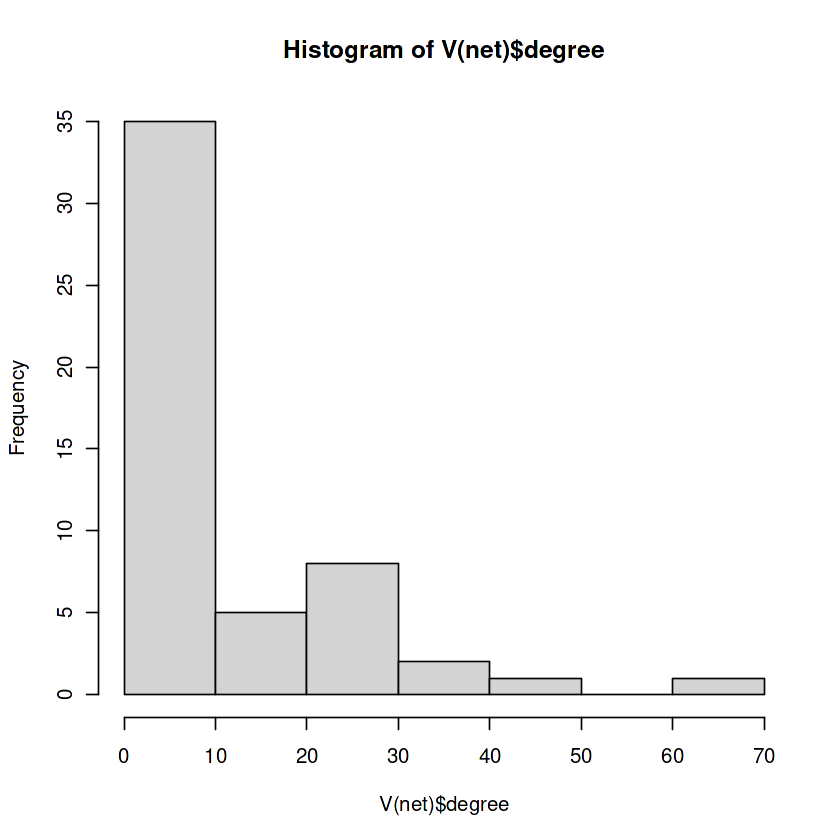

In [6]:
# Histogram of node degree
hist(V(net)$degree)

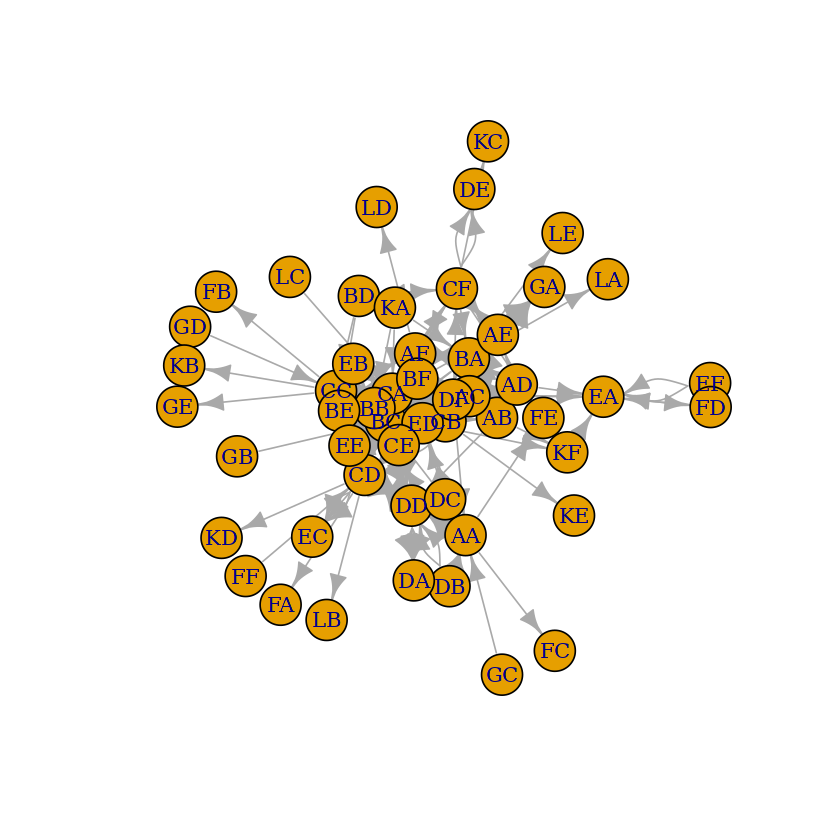

In [7]:
# Network diagram
plot(net)

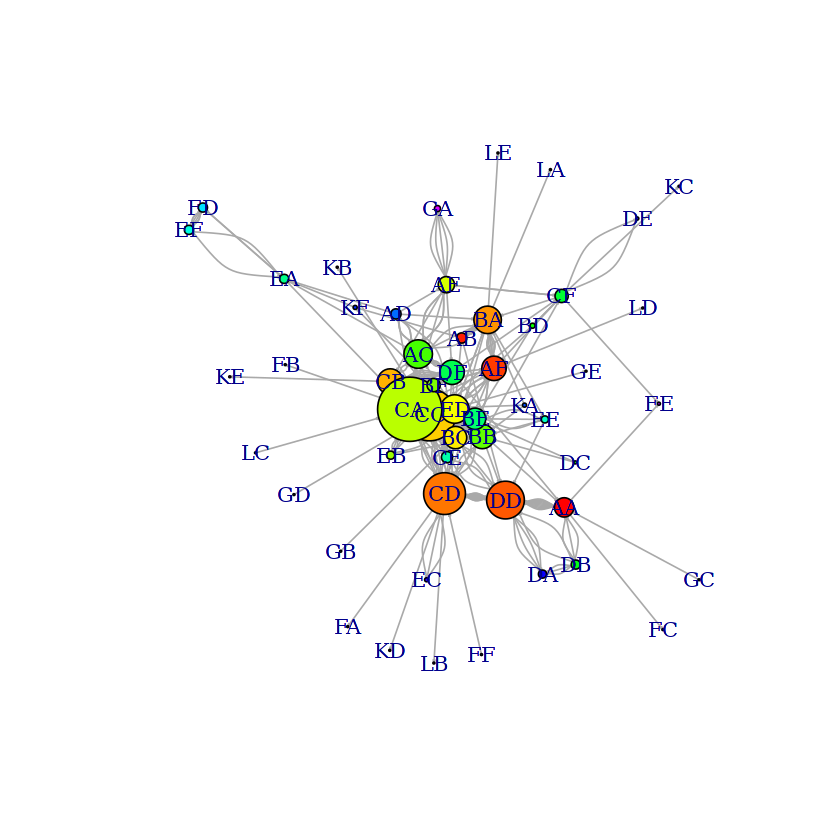

In [8]:
# Highlighting degrees & layouts
plot(net,
vertex.color = rainbow(52),
vertex.size = V(net)$degree * 0.4,
edge.arrow.size = 0.1,
layout = layout.fruchterman.reingold)

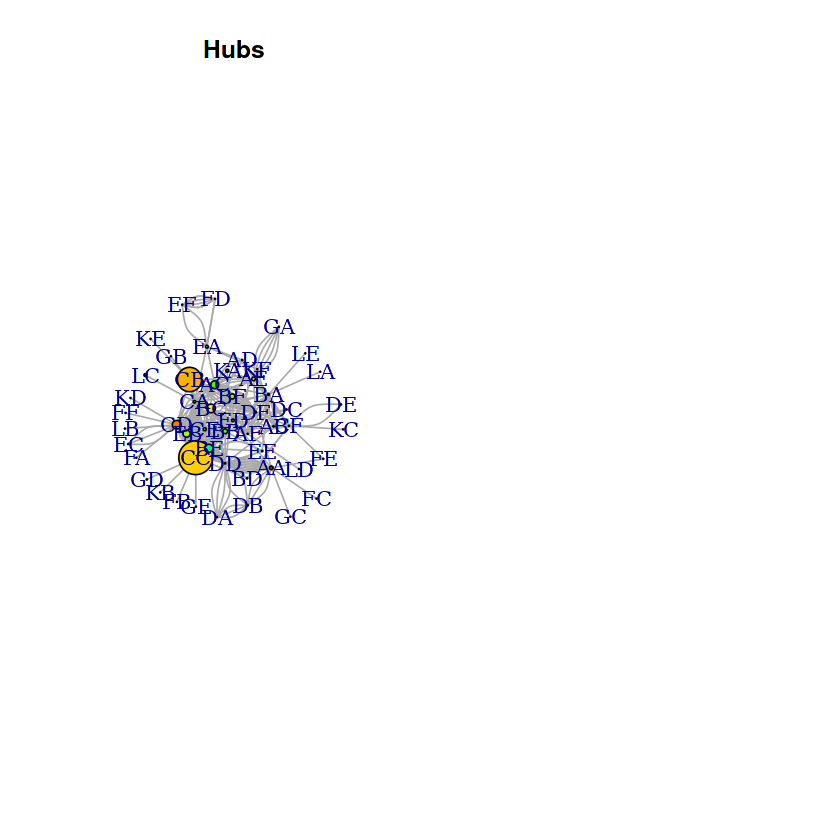

In [9]:
# Hub and authorities
hs <- hub_score(net)$vector
as <- authority.score(net)$vector
par(mfrow = c(1, 2))
set.seed(123)
plot(net, vertex.size = hs * 30,
main = "Hubs", vertex.color = rainbow(52),
edge.arrow.size = 0.1,
layout = layout.kamada.kawai)

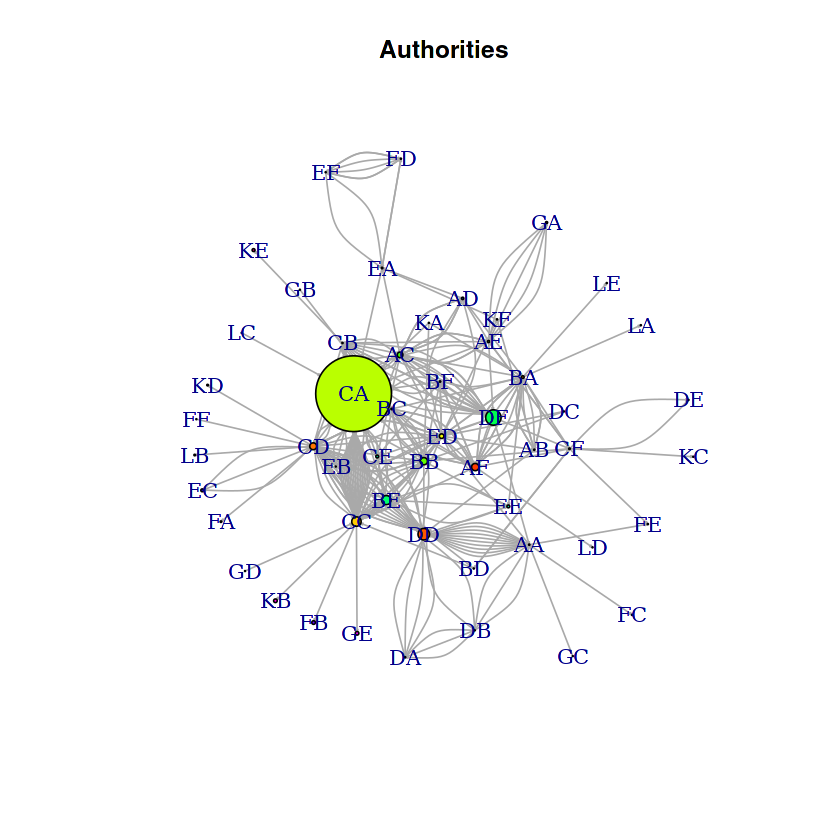

In [10]:
plot(net, vertex.size = as * 30, main = "Authorities",
vertex.color = rainbow(52), edge.arrow.size = 0.1,
layout = layout.kamada.kawai)
par(mfrow = c(1, 1))

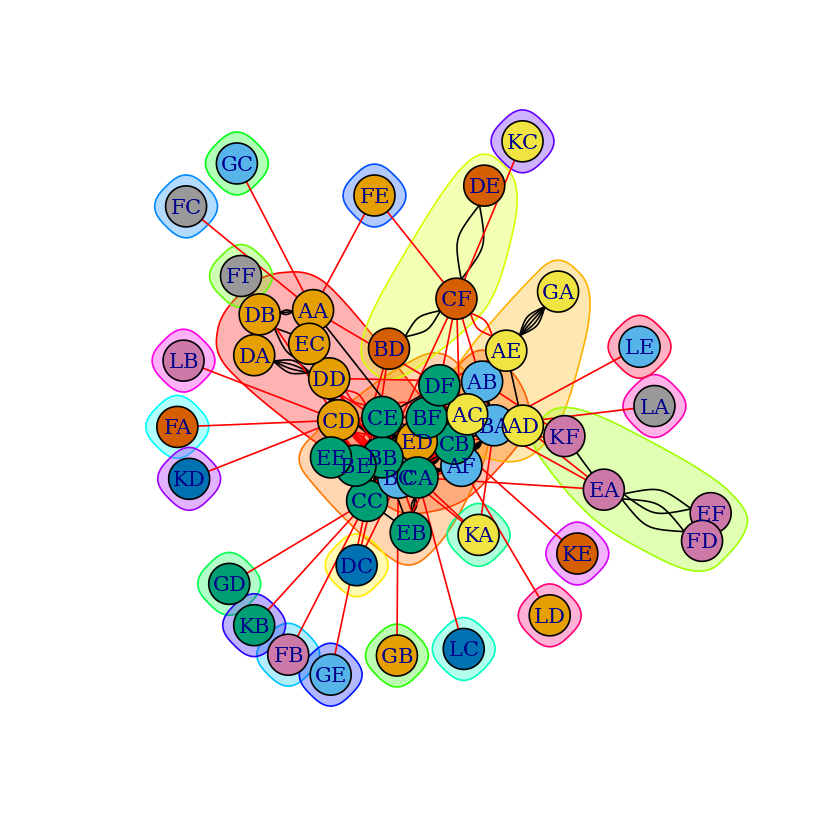

In [11]:
# Community Detection based on edge betweenness
net <- graph.data.frame(y, directed = FALSE)
cnet1 <- cluster_edge_betweenness(net)
plot(cnet1, net)

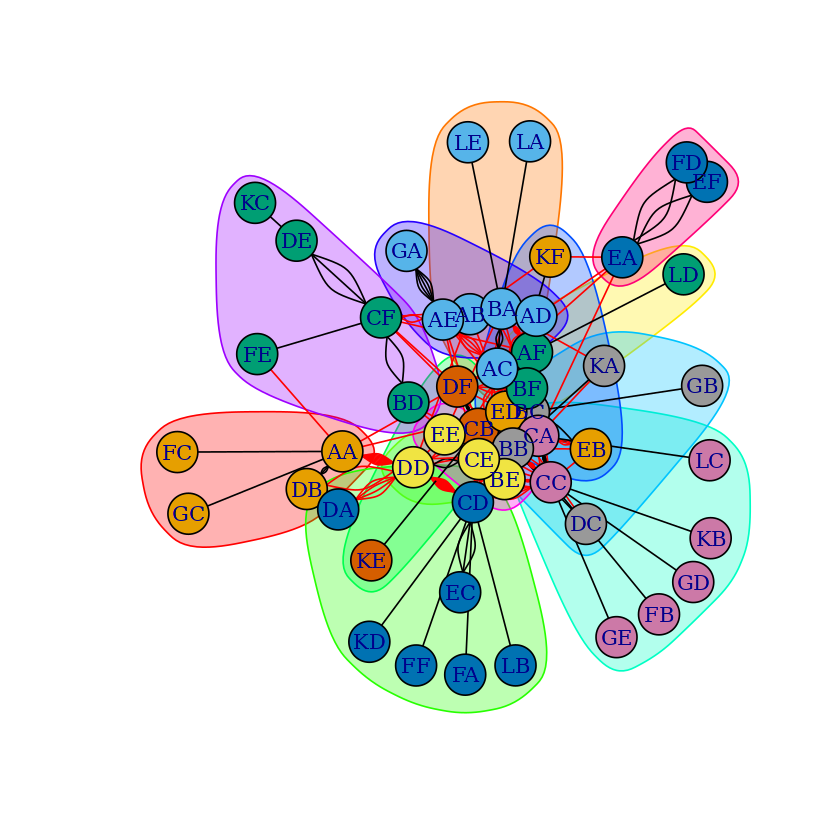

In [12]:
# Find community structure that minimizes the expected description length of a random walker trajectory
cnet2 <- cluster_infomap(net)
plot(cnet2, net)

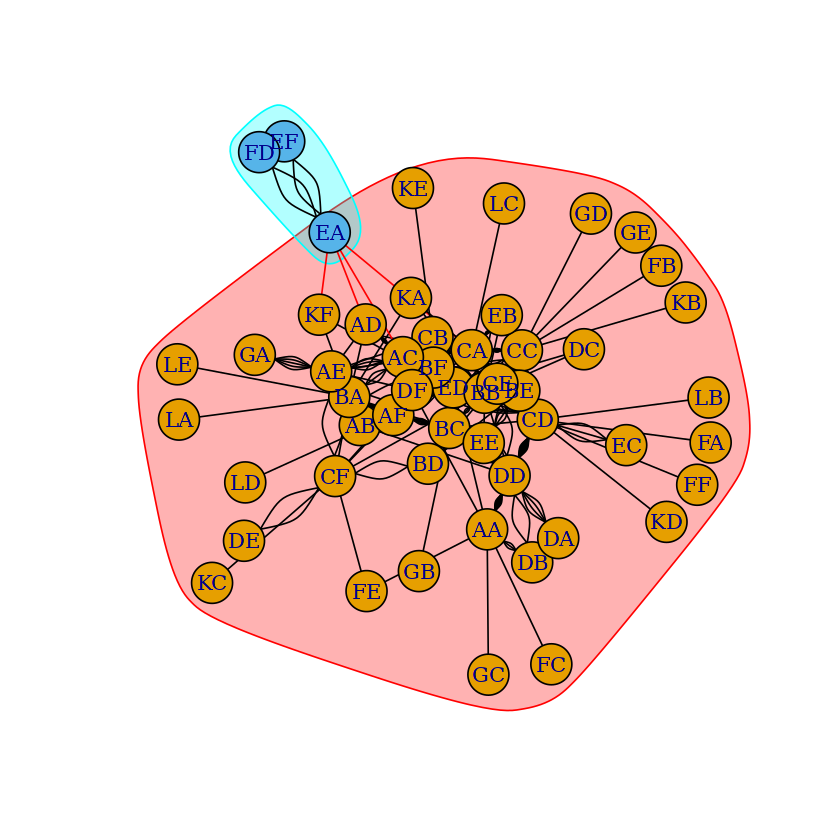

In [13]:
# This is a fast, nearly linear time algorithm for detecting community structure in networks.
# In works by labeling the vertices with unique labels and then updating the labels by majority voting
# in the neighborhood of the vertex.
cnet3 <- cluster_label_prop(net)
plot(cnet3, net)

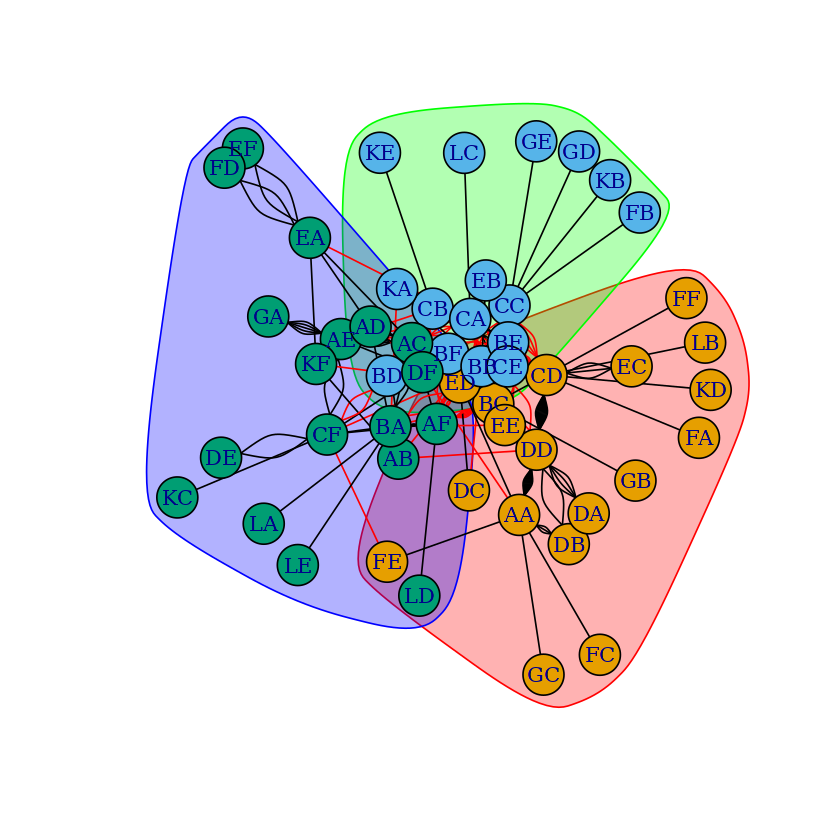

In [14]:
# This function tries to find densely connected subgraphs in a graph by calculating
# the leading non-negative eigenvector of the modularity matrix of the graph.
cnet4 <- cluster_leading_eigen(net)
plot(cnet4, net)

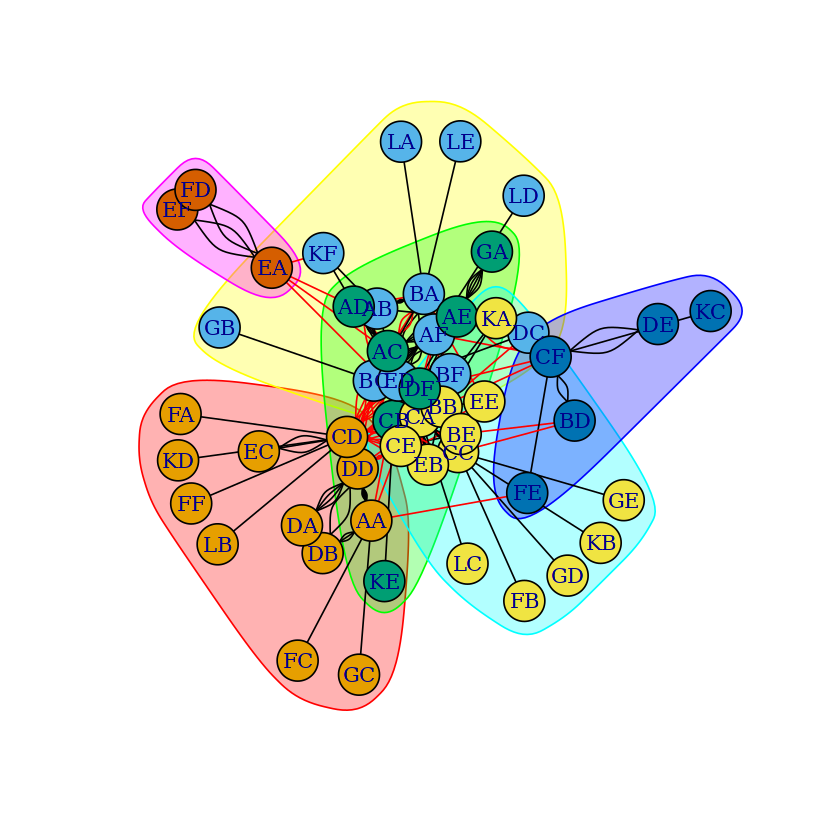

In [15]:
# This function implements the multi-level modularity optimization algorithm for finding community structure.
# It is based on the modularity measure and a hierarchical approach.
cnet5 <- cluster_louvain(net)
plot(cnet5, net)

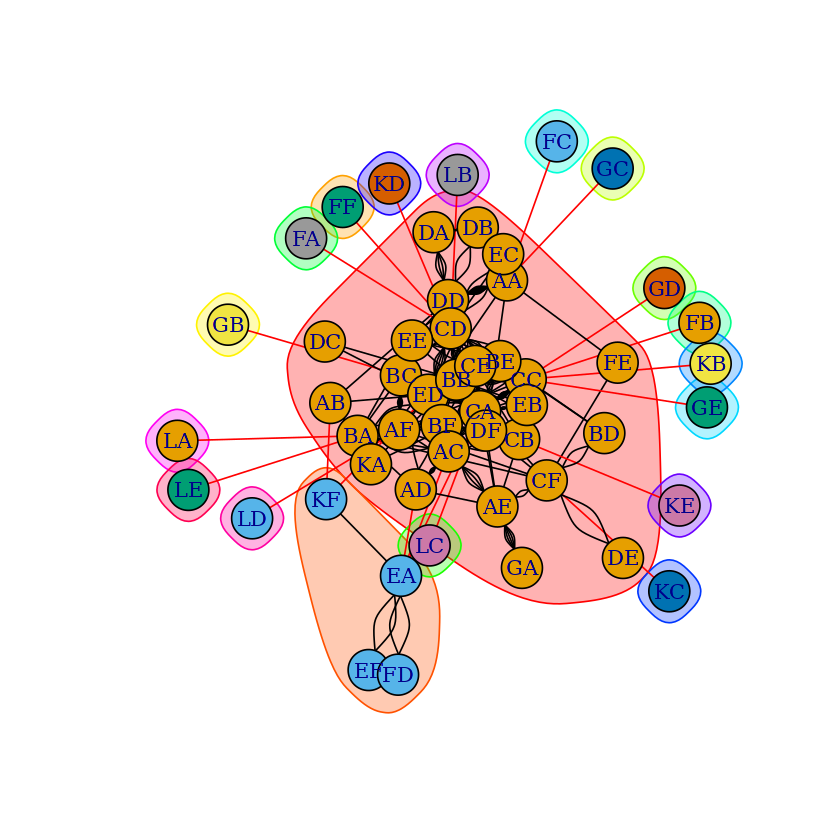

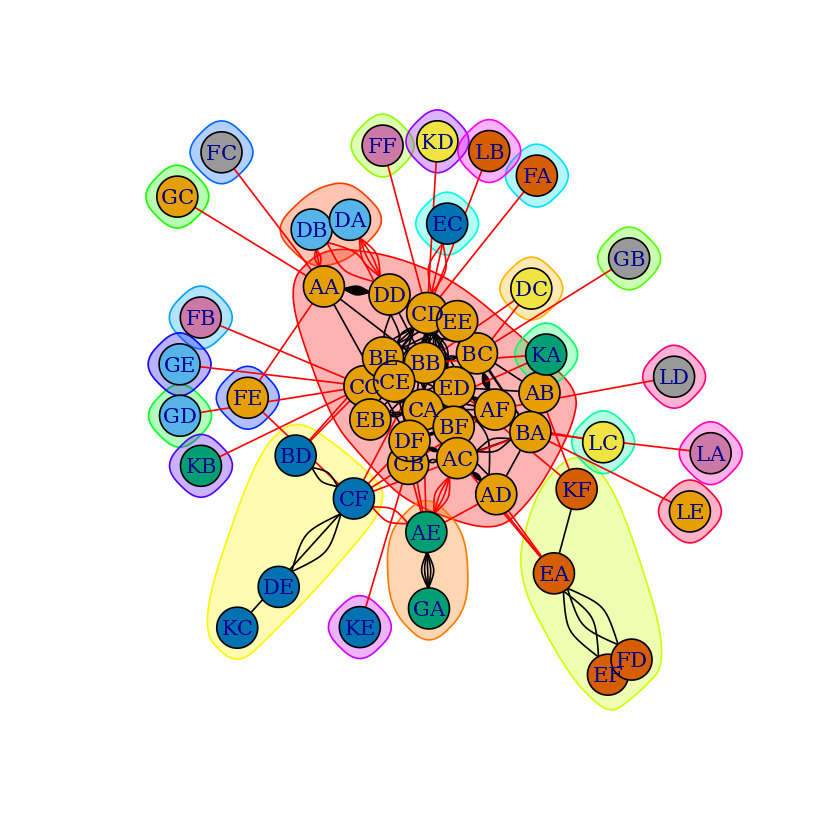

In [16]:
# The Leiden algorithm is similar to the Louvain algorithm,
# but it is faster and yields higher quality solutions.
# It can optimize both modularity and the Constant Potts Model, which does not suffer from the resolution-limit 
cnet6 <- cluster_leiden(net, resolution_parameter=0.06)
cnet7 <- cluster_leiden(net, resolution_parameter=0.3)
plot(cnet6, net)
plot(cnet7, net)

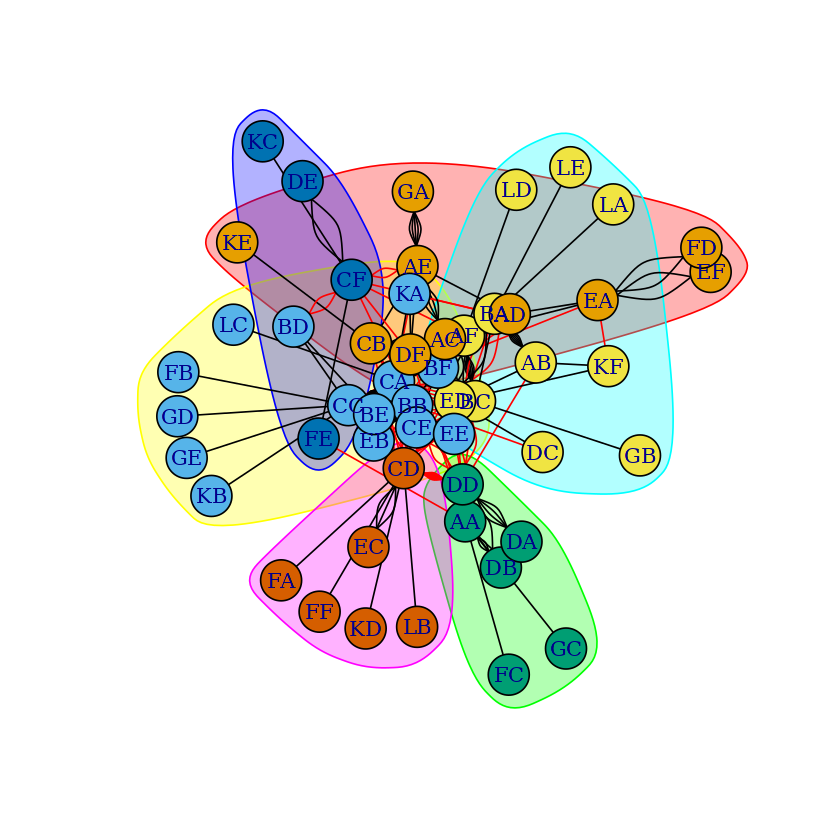

In [17]:
# This function tries to find communities in graphs via a spin-glass model and simulated annealing.
cnet8 <- cluster_spinglass(net, spins=8)
plot(cnet8, net)

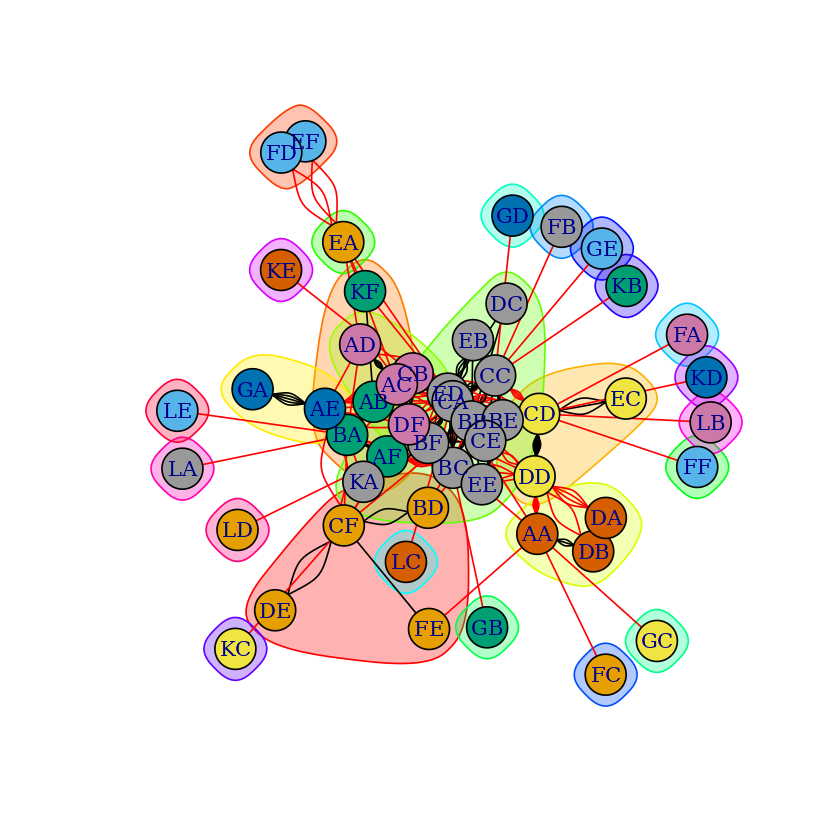

In [18]:
# This function tries to find densely connected subgraphs, also called communities in a graph via random walks.
# The idea is that short random walks tend to stay in the same community.
cnet9 <- cluster_walktrap(net)
plot(cnet9, net)